In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [3]:
pd.set_option('display.max_column',500)
df=pd.read_csv('melb_data.csv')
plt.style.use('seaborn')df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


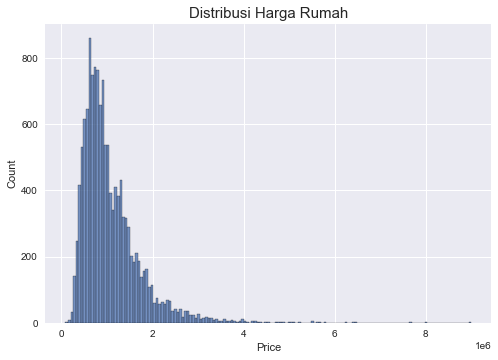

In [10]:
plt.style.use('seaborn')
sns.histplot(df['Price'])
plt.title('Distribusi Harga Rumah',size=15)
plt.show()

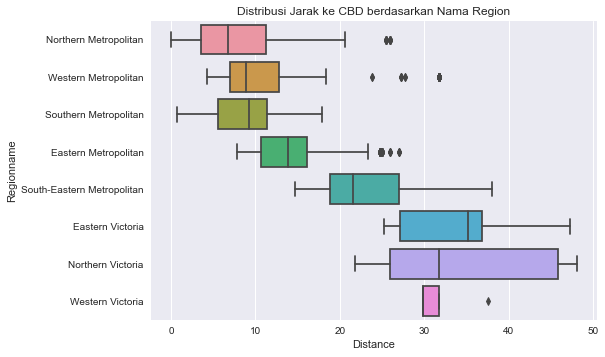

In [13]:
sns.boxplot(x='Distance',y='Regionname',data=df)
plt.title('Distribusi Jarak ke CBD berdasarkan Nama Region',size=15)
plt.show()

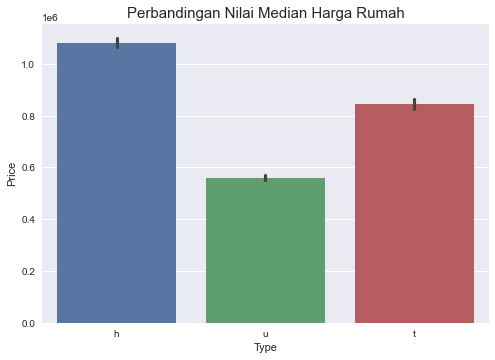

In [20]:
sns.barplot(x='Type',y='Price',estimator=np.median,data=df)
plt.title('Perbandingan Nilai Median Harga Rumah',size=15)
plt.show()

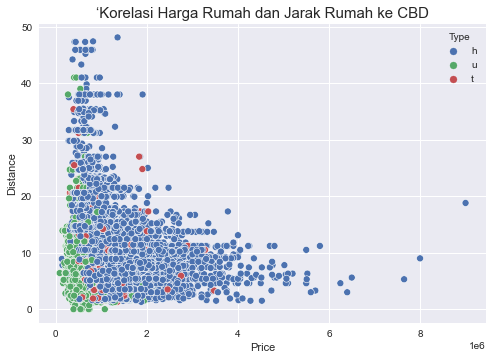

In [23]:
sns.scatterplot(x='Price',y='Distance',data=df,hue='Type')
plt.title('‘Korelasi Harga Rumah dan Jarak Rumah ke CBD',size=15)
plt.show()

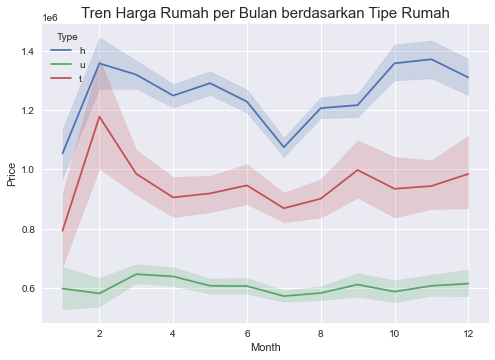

In [46]:
df['Month']=pd.to_datetime(df['Date']).dt.month
sns.lineplot(x='Month',y='Price',data=df,hue='Type')
plt.title('Tren Harga Rumah per Bulan berdasarkan Tipe Rumah',size=15)
plt.show()

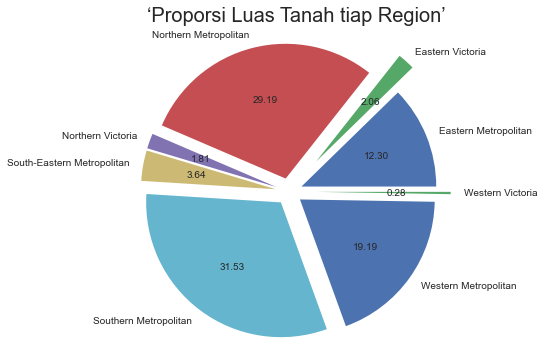

In [61]:
plt.figure(figsize=(8,6))
plt.pie(
    df.groupby('Regionname').sum()['Landsize'],
    labels=df.groupby('Regionname').sum()['Landsize'].index,
    autopct='%.2f', 
    explode=(0.1,0.3,0.1,0.1,0.1,0.1,0.1,0.2) 
)

plt.axis('equal')
plt.title('‘Proporsi Luas Tanah tiap Region’', size=20)
plt.show()

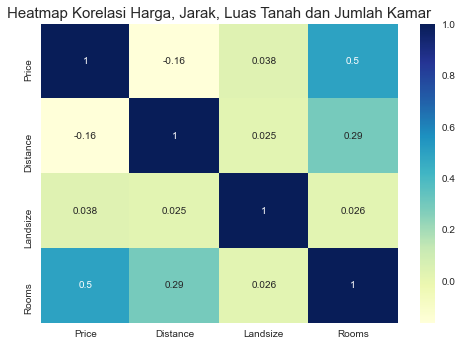

In [74]:
sns.heatmap(df[['Price','Distance','Landsize','Rooms']].corr(),annot=True,cmap='YlGnBu')
plt.title('Heatmap Korelasi Harga, Jarak, Luas Tanah dan Jumlah Kamar',size=15)
plt.show()

In [92]:
df.price = df.sort_values(by='Price',ascending=False).head(10)
melbourne_map=folium.Map(location=[-37.8136, 144.9631],zoom_start=11)
for i in range(10):
    folium.Marker([df.price.iloc[i]['Lattitude'], df.price.iloc[i]['Longtitude']],
              popup=f'''Price: AUD {df.price.iloc[0]['Price']/1000000} M''',
              tooltip= df.price.iloc[0]['Address'],
              icon= folium.Icon(color='red',icon='info-sign')
             ).add_to(melbourne_map)

melbourne_map
    